<a href="https://colab.research.google.com/github/hieuledinh/Pneumonia-Detection-with-Deep-Learning-using-CNNs/blob/main/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import cv2
import os
import random
import tensorflow

import matplotlib.pyplot as plt
# %matplotlib inline

import numpy as np
# from texttable import Texttable

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, SeparableConv2D, \
    Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing import image

In [ ]:
import tensorflow as tf

In [ ]:
DATA_DIR_VAL = '/content/drive/MyDrive/pneumonia_data/chest_xray'
TRAINING_DATA_DIR_VAL = DATA_DIR_VAL + '/train/'
TEST_DATA_DIR_VAL = DATA_DIR_VAL + '/test/'
VAL_DATA_DIR_VAL = DATA_DIR_VAL + '/val/'


DETECTION_CLASSES = ('NORMAL', 'PNEUMONIA')
BATCH_SIZE = 32


# data generator on training dataset, data augmentation applied
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the training dataset
training_dataset = train_datagen.flow_from_directory(TRAINING_DATA_DIR_VAL,
                                                     classes=DETECTION_CLASSES,
                                                     shuffle=False,
                                                      batch_size=BATCH_SIZE,
                                                     target_size=(224, 224))

# data generator on test dataset, data augmentation not applied
# used as validation dataset as the val dir contains only 16 images
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the test dataset (used as validation)
test_dataset = test_datagen.flow_from_directory(TEST_DATA_DIR_VAL,
                                                classes=DETECTION_CLASSES,
                                                shuffle=False,
                                                batch_size=BATCH_SIZE,
                                                target_size=(224, 224))

# data generator on validation dataset, data augmentation not applied
val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# preprocessing the validation dataset
val_dataset = test_datagen.flow_from_directory(VAL_DATA_DIR_VAL,
                                               classes=DETECTION_CLASSES,
                                               target_size=(224, 224))


Found 0 images belonging to 2 classes.
Found 5840 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = load_model("/content/drive/MyDrive/pneumonia_data/model_data/dense_model_data(20_3epochs).h5")


In [ ]:
test_dir = "/content/drive/MyDrive/pneumonia_data/chest_xray/test"
test_data, test_labels = [], []

Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/PNEUMONIA/person121_bacteria_575 (1).jpeg
0
1/1 [==============================] - 6s 6s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/PNEUMONIA/person175_bacteria_833 (1).jpeg
1
1/1 [==============================] - 3s 3s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/PNEUMONIA/person134_bacteria_641 (1).jpeg
2
1/1 [==============================] - 2s 2s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/PNEUMONIA/person122_bacteria_584 (1).jpeg
3
1/1 [==============================] - 2s 2s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/PNEUMONIA/person71_virus_132 (1).jpeg
4


1/1 [==============================] - 2s 2s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/NORMAL/NORMAL2-IM-0146-0001 (1).jpeg
5


1/1 [==============================] - 2s 2s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/NORMAL/NORMAL2-IM-0249-0001 (1).jpeg
6
1/1 [==============================] - 2s 2s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/NORMAL/NORMAL2-IM-0374-0001-0002 (1).jpeg
7
1/1 [==============================] - 2s 2s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/NORMAL/NORMAL2-IM-0066-0001 (1).jpeg
8
1/1 [==============================] - 3s 3s/step
Đang dự đoán cho hình ảnh: /content/drive/MyDrive/pneumonia_data/chest_xray/test/NORMAL/NORMAL2-IM-0294-0001 (1).jpeg
9
1/1 [==============================] - 2s 2s/step


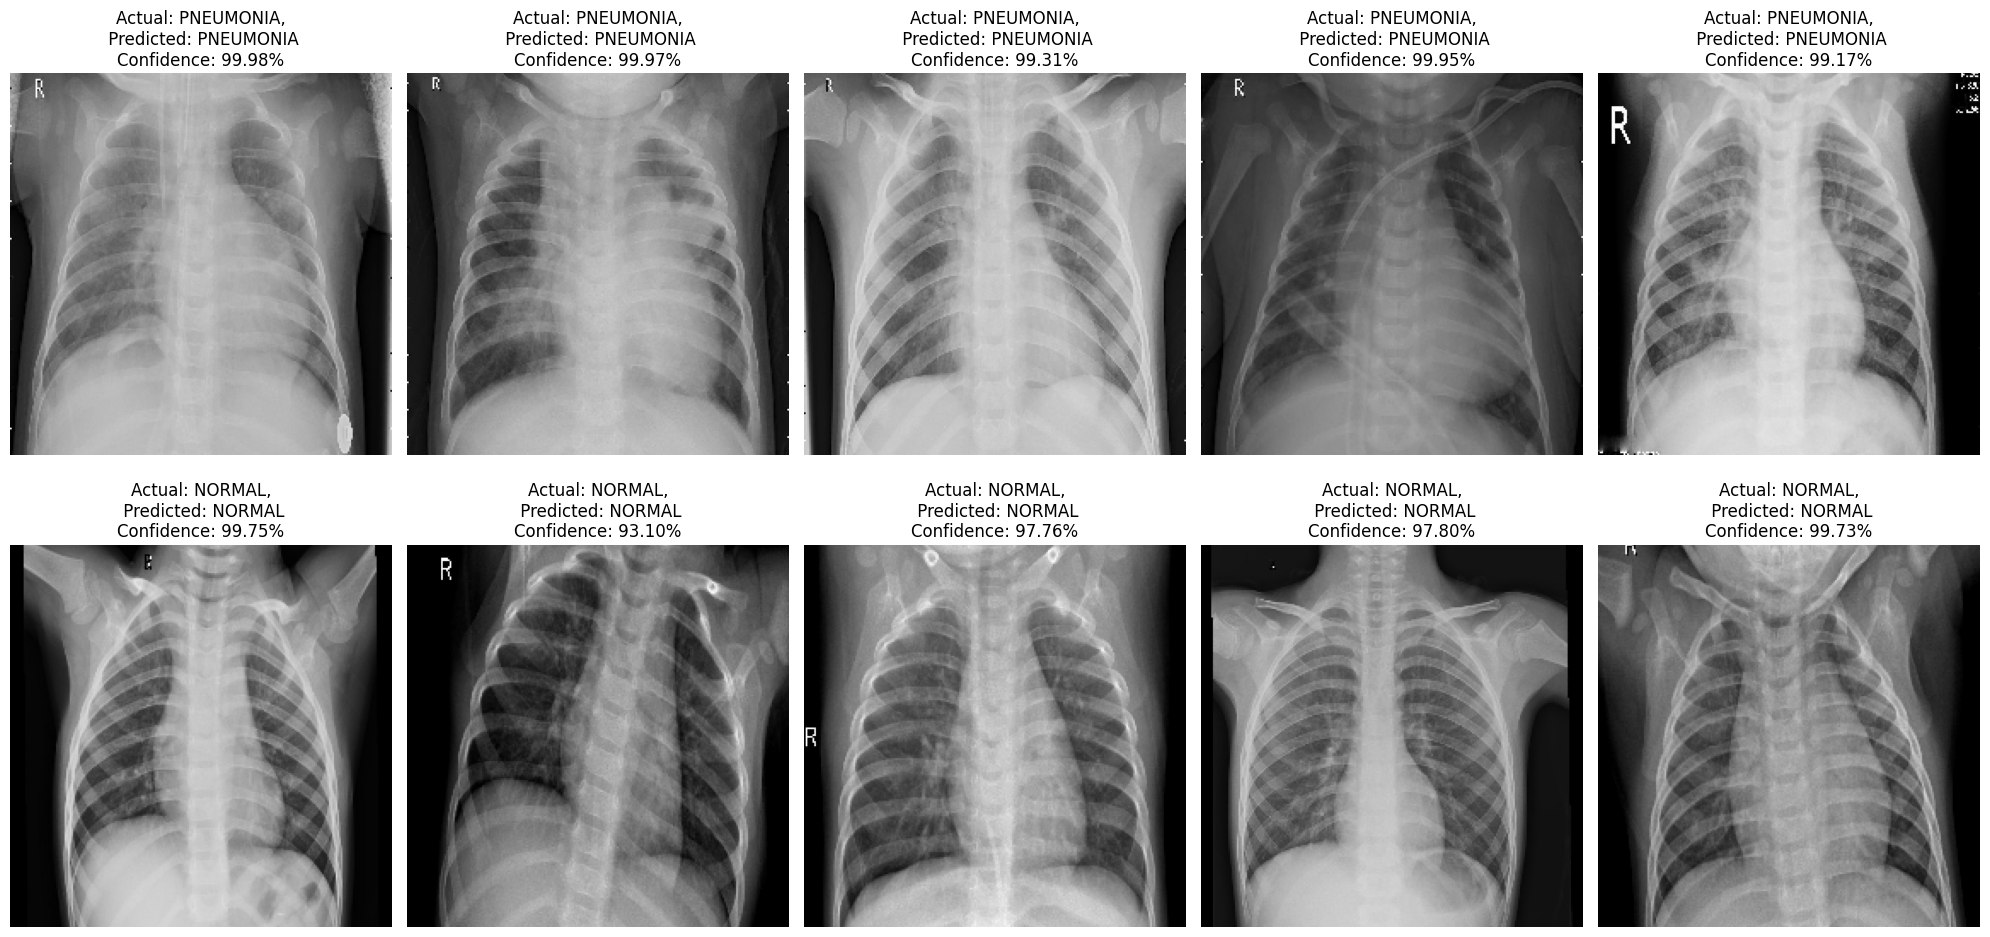

In [ ]:
# Đường dẫn tới thư mục chứa hình ảnh để dự đoán cho VIÊM PHỔI
image_folder_path1 = "/content/drive/MyDrive/pneumonia_data/chest_xray/test/PNEUMONIA"
# Đường dẫn tới thư mục chứa hình ảnh để dự đoán cho BÌNH THƯỜNG
image_folder_path2 = "/content/drive/MyDrive/pneumonia_data/chest_xray/test/NORMAL"

# Lấy ra 3 hình ảnh ngẫu nhiên từ thư mục cho VIÊM PHỔI
random_images_pneumonia = random.sample(os.listdir(image_folder_path1), 5)

# Lấy ra 3 hình ảnh ngẫu nhiên từ thư mục cho BÌNH THƯỜNG
random_images_normal = random.sample(os.listdir(image_folder_path2), 5)

# Kết hợp các hình ảnh thành một danh sách chung
random_images = random_images_pneumonia + random_images_normal

# Tạo một lưới hình ảnh với 2 hàng và 3 cột
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Duyệt qua từng hình ảnh và dự đoán
for i, image_file in enumerate(random_images):
    if i < 5:
        image_path = os.path.join(image_folder_path1, image_file)
        label = "PNEUMONIA"
    else:
        image_path = os.path.join(image_folder_path2, image_file)
        label = "NORMAL"
    print("Đang dự đoán cho hình ảnh:", image_path)
    print(i)

    # Dự đoán và hiển thị hình ảnh
    ax = axs[i // 5, i % 5]  # Chọn ô trong lưới
    ax.set_title("Image " + str(i+1))
    ax.axis('off')

    # Dự đoán và hiển thị hình ảnh
    test_image = image.load_img(image_path, target_size=(224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image = test_image / 255.0
    model_loaded = tensorflow.keras.models.load_model("/content/drive/MyDrive/pneumonia_data/model_data/dense_model_data(20_3epochs).h5")
    prediction = model_loaded.predict(test_image)
    test_image_for_plotting = image.load_img(image_path, target_size=(224, 224))
    ax.imshow(test_image_for_plotting)

    # So sánh dự đoán với nhãn thực tế
    predicted_label = "PNEUMONIA" if prediction[0][1] > 0.5 else "NORMAL"
    confidence_percent = prediction[0][1] * 100 if predicted_label == "PNEUMONIA" else (1.0 - prediction[0][1]) * 100

    ax.set_title(f"Actual: {label},\n Predicted: {predicted_label}\nConfidence: {confidence_percent:.2f}%")

plt.tight_layout()
plt.show()